# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL

url = f'https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}{city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

     # Run an API request for each of the cities
    try:
         # Parse the JSON and retrieve data
         #print(city_url)
         city_weather = requests.get(city_url).json()
        
         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
         city_lat = city_weather['coord']['lat']
         city_lng = city_weather['coord']['lon']
         city_max_temp = city_weather['main']['temp_max']
         city_humidity = city_weather['main']['humidity']
         city_clouds = city_weather['clouds']['all']
         city_wind = city_weather['wind']['speed']
         city_country = city_weather['sys']['country']
         city_date = city_weather['dt']

        # Append the City information into city_data list
         city_data.append({"City": city, 
                           "Lat": city_lat, 
                           "Lng": city_lng, 
                           "Max Temp": city_max_temp,
                           "Humidity": city_humidity,
                           "Cloudiness": city_clouds,
                           "Wind Speed": city_wind,
                           "Country": city_country,
                           "Date": city_date})

     # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
    pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | khandyga
Processing Record 2 of Set 1 | grindavik
Processing Record 3 of Set 1 | solnechnyy
Processing Record 4 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 5 of Set 1 | bara
Processing Record 6 of Set 1 | castro
Processing Record 7 of Set 1 | mariel
Processing Record 8 of Set 1 | lubango
Processing Record 9 of Set 1 | kodiak
Processing Record 10 of Set 1 | governador valadares
Processing Record 11 of Set 1 | launceston
Processing Record 12 of Set 1 | ilulissat
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | qaanaaq
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | klaksvik
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | butaritari
Processing Record 22 of Set 1 | so

In [9]:
# Convert the cities weather data into a Pandas DataFrame
file_path = 'output_data/cities.csv'
city_data_df = pd.DataFrame(city_data)
city_data_df.to_csv(file_path,encoding='utf-8')
# city_data_df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,khandyga,62.6667,135.6000,241.83,98,100,1.42,RU,1670189475
1,grindavik,63.8424,-22.4338,276.12,100,75,3.09,IS,1670189475
2,solnechnyy,50.7214,136.6319,248.49,89,17,1.58,RU,1670189476
3,bara,10.3744,10.7288,300.21,21,8,6.00,NG,1670189476
4,castro,-24.7911,-50.0119,292.20,96,100,1.94,BR,1670189476


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [4]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,khandyga,62.6667,135.6000,241.83,98,100,1.42,RU,1670189475
1,grindavik,63.8424,-22.4338,276.12,100,75,3.09,IS,1670189475
2,solnechnyy,50.7214,136.6319,248.49,89,17,1.58,RU,1670189476
3,bara,10.3744,10.7288,300.21,21,8,6.00,NG,1670189476
4,castro,-24.7911,-50.0119,292.20,96,100,1.94,BR,1670189476


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

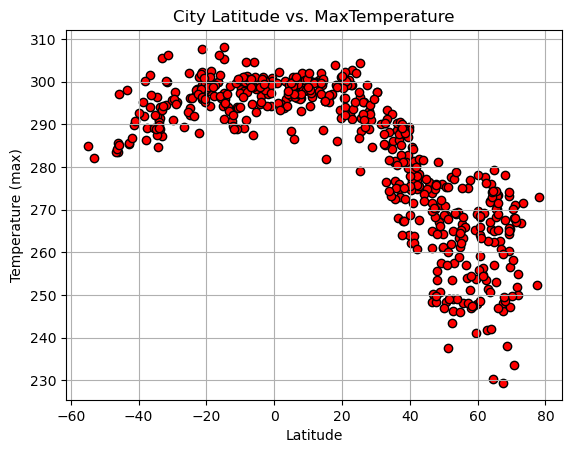

In [5]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker="o", facecolors="red", edgecolors="black")
#            s=city_data_df['Lat'], alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. MaxTemperature')
plt.ylabel('Temperature (max)')
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/LatitudeVsMaxTemperature.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

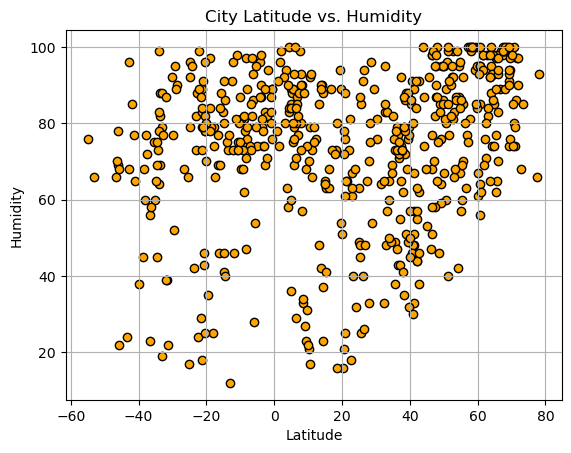

In [6]:
# Build scatter plot for latitude vs. Humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker="o", facecolors="orange", edgecolors="black")

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.ylabel('Humidity')
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/LatitudeVsHumidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

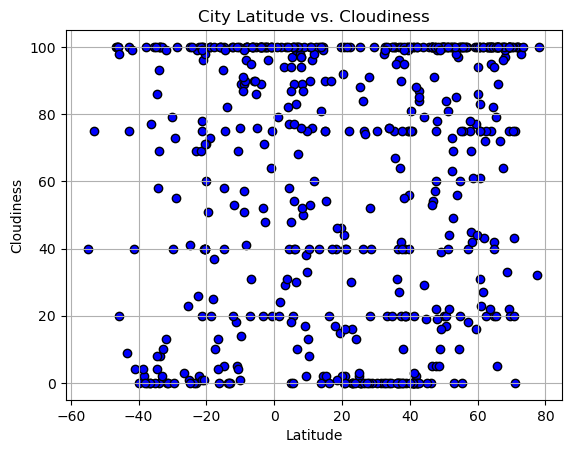

In [7]:
# Build scatter plot for latitude vs. Cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker="o", facecolors="Blue", edgecolors="black")

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.ylabel('Cloudiness')
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/LatitudeVsCloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

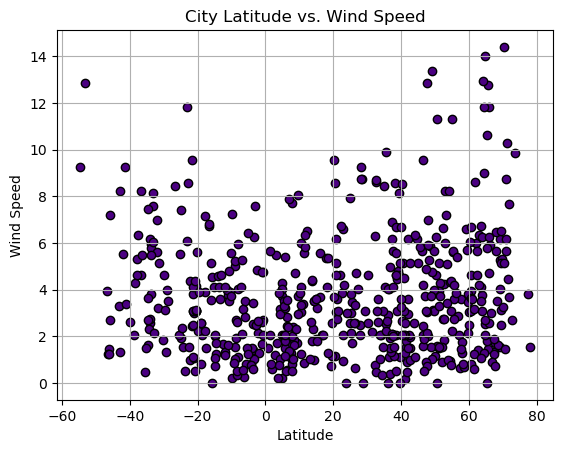

In [8]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker="o", facecolors="Indigo", edgecolors="black")

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.ylabel('Wind Speed')
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/LatitudeVsWindSpeed.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [9]:
# Define a function to create Linear Regression plots
def make_lreg_plot(x_vals,y_vals,x_desc,y_desc,latitude,x_regloc,y_regloc,face_color,edge_color,filename):
    # Determine the r-squared value along with the plot.
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
    reg_vals = x_vals * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_vals,y_vals,edgecolors=edge_color,facecolors=face_color)
    plt.plot(x_vals,reg_vals,"r-")

    plt.xlabel(x_desc)
    plt.ylabel(y_desc)

    plt.annotate(line_eq,(x_regloc,y_regloc),fontsize=15,color="red")

    plt.title(f"{latitude}-\n {x_desc} vs. {y_desc}")
    
    print(f"r-squared: {rvalue}")
    print(line_eq)
    
    plt.savefig(f'output_data/{filename}')
    plt.show()

In [54]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_key_df = city_data_df.Lat >= 0

#get records for the key
northern_hemi_df = city_data_df[northern_hemi_key_df]
#northern_hemi_df.sort_values("Lat",ascending=False,inplace=True)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,khandyga,62.6667,135.6000,241.83,98,100,1.42,RU,1670189475
1,grindavik,63.8424,-22.4338,276.12,100,75,3.09,IS,1670189475
2,solnechnyy,50.7214,136.6319,248.49,89,17,1.58,RU,1670189476
3,bara,10.3744,10.7288,300.21,21,8,6.00,NG,1670189476
5,mariel,22.9875,-82.7536,299.23,67,16,6.58,CU,1670189477


In [55]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_key_df = city_data_df.Lat < 0

#get records for the key
southern_hemi_df = city_data_df[southern_hemi_key_df]
#southern_hemi_df.sort_values("Lat",ascending=True,inplace=True)

southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,castro,-24.7911,-50.0119,292.20,96,100,1.94,BR,1670189476
6,lubango,-14.9172,13.4925,291.22,80,100,0.74,AO,1670189477
8,governador valadares,-18.8511,-41.9494,294.22,97,100,2.56,BR,1670189478
9,launceston,-41.4500,147.1667,289.95,77,40,9.26,AU,1670189377
11,new norfolk,-42.7826,147.0587,285.33,68,100,1.34,AU,1670189479


###  Temperature vs. Latitude Linear Regression Plot

r-squared: -0.8404861939632594
y = -0.71x + 305.48


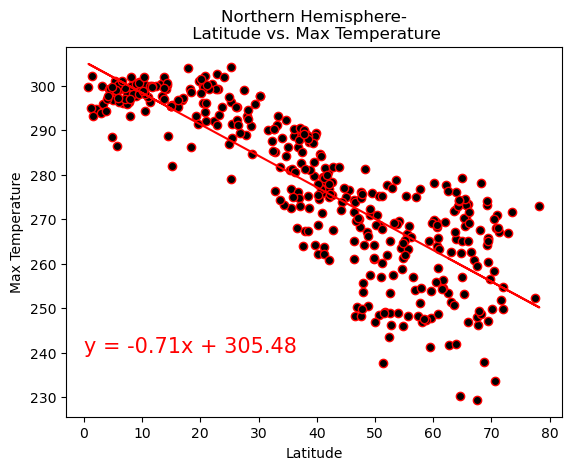

In [56]:
# Linear regression on Northern Hemisphere
make_lreg_plot( northern_hemi_df["Lat"]
                ,northern_hemi_df["Max Temp"]
                ,'Latitude'
                ,'Max Temperature'
                ,'Northern Hemisphere'
                ,0
                ,240
                ,'black',
                'red',
                'MaxTempVsLat-LinearReg.png')

r-squared: 0.5387793192715278
y = 0.21x + 300.23


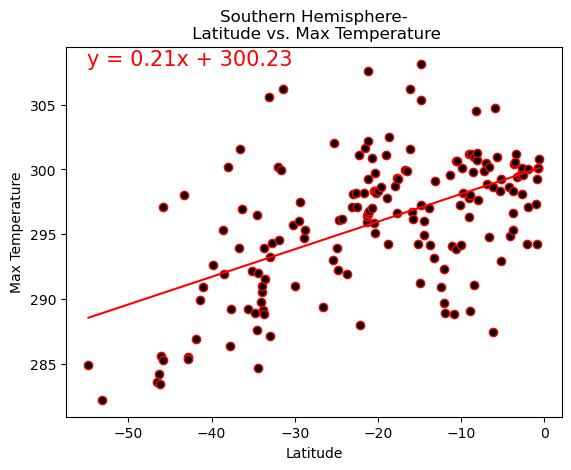

In [53]:
# Linear regression on Southern Hemisphere
make_lreg_plot( southern_hemi_df["Lat"]
                ,southern_hemi_df["Max Temp"]
                ,'Latitude'
                ,'Max Temperature'
                ,'Southern Hemisphere'
                ,-55
                ,308
                ,'black',
                'red',
                'MaxTempVsLat-LinearReg.png')

**Discussion about the linear relationship:** 

The northern hemisphere scatterplot with r-squared value of 0.84, shows a strong negative linear relationship between increasing latitude and decreasing temperature.
This means 84% of the variance is explained by this linear model.

The southern hemisphere scatterplot with r-squared value of 0.53, shows a medium negative linear relationship between increasing latitude and increasing temperature.
This means 53% of the variance is explained by this linear model.

### Humidity vs. Latitude Linear Regression Plot

r-squared: 0.31878926114177536
y = 0.31x + 62.64


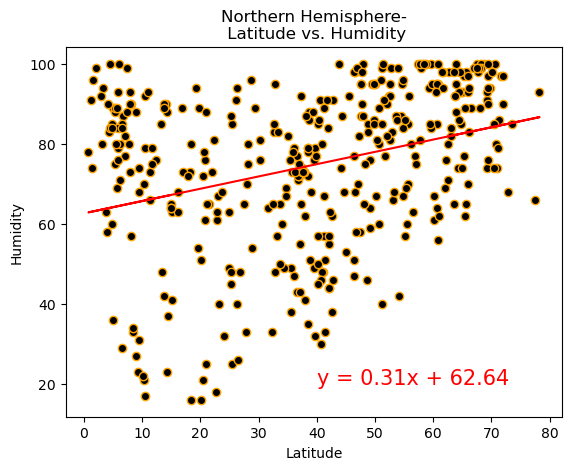

In [36]:
# Northern Hemisphere
make_lreg_plot( northern_hemi_df["Lat"]
                ,northern_hemi_df["Humidity"]
                ,'Latitude'
                ,'Humidity'
                ,'Northern Hemisphere'
                ,40
                ,20
                ,'black',
                'orange',
                'LatVsHumidity-LinearReg.png')

r-squared: 0.252364985125742
y = 0.39x + 79.69


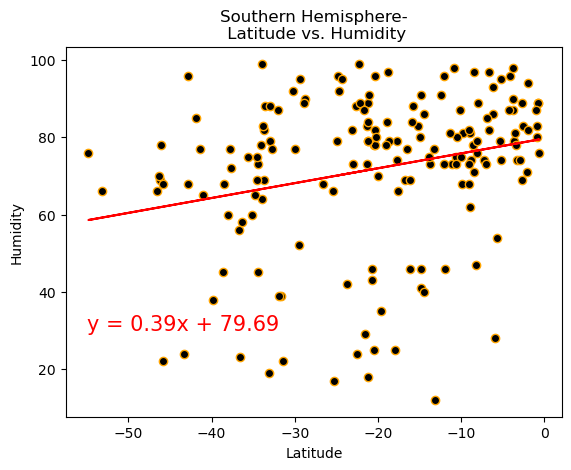

In [40]:
# Southern Hemisphere
make_lreg_plot( southern_hemi_df["Lat"]
                ,southern_hemi_df["Humidity"]
                ,'Latitude'
                ,'Humidity'
                ,'Southern Hemisphere'
                ,-55
                ,30
                ,'black',
                'orange',
                'LatVsHumidity-LinearReg.png')

**Discussion about the linear relationship:**

The northern hemisphere scatterplot with r-squared value of 0.31, shows a weak linear relationship between increasing latitude and increasing Humidity.
This means that there is a weak correlation between latitude and humidity in the northern hemisphere

The southern hemisphere scatterplot with r-squared value of 0.25, shows a weak linear relationship between increasing latitude and increasing Humidity
This means that there is a little correlation between latitude and humidity in the southern hemisphere

### Cloudiness vs. Latitude Linear Regression Plot

r-squared: 0.17474335574203767
y = 0.32x + 49.34


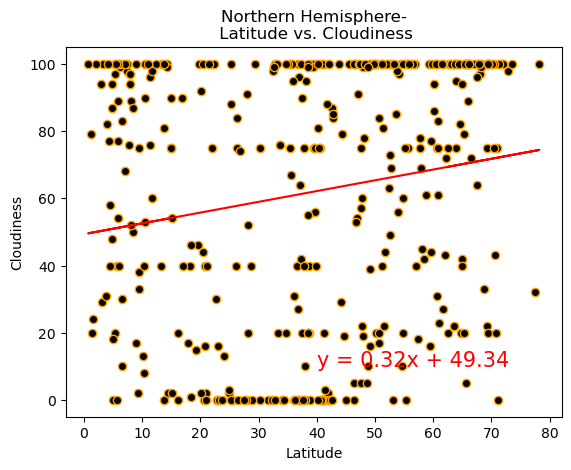

In [59]:
# Northern Hemisphere
make_lreg_plot( northern_hemi_df["Lat"]
                ,northern_hemi_df["Cloudiness"]
                ,'Latitude'
                ,'Cloudiness'
                ,'Northern Hemisphere'
                ,40
                ,10
                ,'black',
                'orange',
                'LatVsCloudiness-LinearReg.png')

r-squared: 0.25068637284932366
y = 0.76x + 75.87


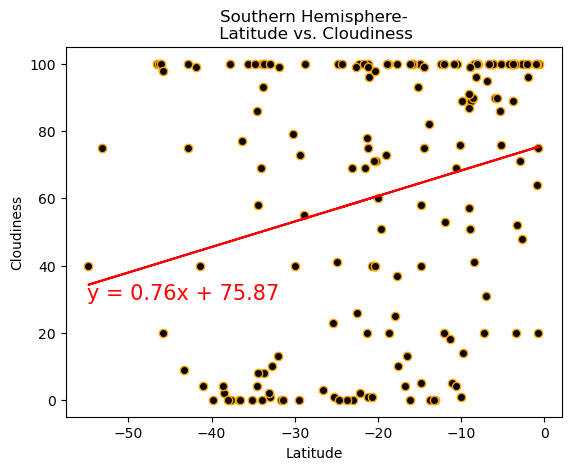

In [60]:
# Southern Hemisphere
make_lreg_plot( southern_hemi_df["Lat"]
                ,southern_hemi_df["Cloudiness"]
                ,'Latitude'
                ,'Cloudiness'
                ,'Southern Hemisphere'
                ,-55
                ,30
                ,'black',
                'orange',
                'LatVsCloudiness-LinearReg.png')

**Discussion about the linear relationship:**

The northern hemisphere scatterplot with r-squared value of 0.17, shows a very weak linear relationship between increasing latitude and increasing cloudiness.
This means that the linear equation describes only 17% of the corrrelation. This means there is no correlation between latitude and cloudiness in the northern hemisphere

The southern hemisphere scatterplot with r-squared value of 0.25, shows a weak linear relationship between increasing latitude and increasing cloudiness
This means that there is a little correlation between latitude and cloudiness in the southern hemisphere

### Wind Speed vs. Latitude Linear Regression Plot

r-squared: 0.21170352294136996
y = 0.03x + 2.66


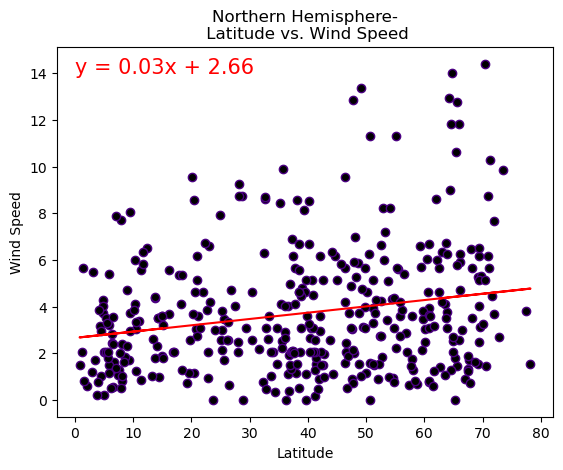

In [65]:
# Northern Hemisphere
make_lreg_plot( northern_hemi_df["Lat"]
                ,northern_hemi_df["Wind Speed"]
                ,'Latitude'
                ,'Wind Speed'
                ,'Northern Hemisphere'
                ,0
                ,14
                ,'black',
                'Indigo',
                'LatVsWindSpeed-LinearReg.png')

r-squared: -0.32421011310021497
y = -0.06x + 2.39


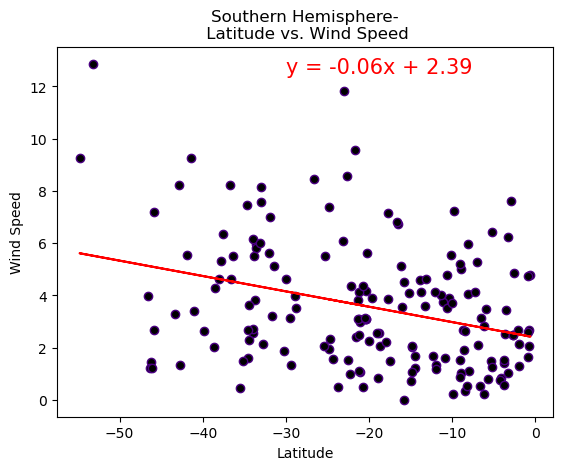

In [67]:
# Southern Hemisphere
make_lreg_plot( southern_hemi_df["Lat"]
                ,southern_hemi_df["Wind Speed"]
                ,'Latitude'
                ,'Wind Speed'
                ,'Southern Hemisphere'
                ,-30
                ,12.5
                ,'black',
                'Indigo',
                'LatVsWindSpeed-LinearReg.png')

**Discussion about the linear relationship:** 

The northern hemisphere scatterplot with r-squared value of 0.21, shows a very weak linear relationship between increasing latitude and increasing wind speed.
This means that the linear equation describes only 21% of the corrrelation. This means there is no correlation between latitude and wind speed in the northern hemisphere

Southern Hemisphere shows a relatively stronger correlation between latitude and wind speed with an r-squared value of -0.32.
Generally this would mean that there is a weak correlation between latitude and wind speed in the Southern Hemisphere. It could also be that we do not have data from some parts of the souther hemisphere closer to the poles as we move away from the equator. The data plot shows there is a gap in wind speed recordings in those regions